# Field Definition

This was the prototyping work that I used to create the `roplot.FieldPowerPlay` class.

In [72]:
from itertools import product
import numpy as np
import geopandas as gpd
from shapely.geometry import LineString, Polygon, Point, MultiPolygon, MultiLineString

See this [Sample Notebook](https://github.com/geopandas/geopandas/blob/main/doc/source/gallery/overlays.ipynb) for an example of how to define polygons.

In [18]:
field = Polygon([(0,0), (0, 144), (144,144), (144,0), (0,0)])
field.area

offsets = np.array([1,2,3,4,5]) * 24
junctions = {
    "ground": [Point(i,j) for i,j in 
               product(offsets[0:5:2], offsets[0:5:2])],
    "low": [Point(i,j) for i,j in 
            product(offsets[[1,3]], offsets[[0, 4]])]
         + [Point(i,j) for i,j in 
            product(offsets[[0,4]], offsets[[1, 3]])],
    "medium": [Point(i,j) for i,j in 
               product(offsets[[1,3]], offsets[[1, 3]])],
    "high": [Point(offsets[1], offsets[2]),
             Point(offsets[2], offsets[1]),
             Point(offsets[2], offsets[3]),
             Point(offsets[3], offsets[2]),
            ]
}

junctions

{'ground': [<POINT (24 24)>,
  <POINT (24 72)>,
  <POINT (24 120)>,
  <POINT (72 24)>,
  <POINT (72 72)>,
  <POINT (72 120)>,
  <POINT (120 24)>,
  <POINT (120 72)>,
  <POINT (120 120)>],
 'low': [<POINT (48 24)>,
  <POINT (48 120)>,
  <POINT (96 24)>,
  <POINT (96 120)>,
  <POINT (24 48)>,
  <POINT (24 96)>,
  <POINT (120 48)>,
  <POINT (120 96)>],
 'medium': [<POINT (48 48)>,
  <POINT (48 96)>,
  <POINT (96 48)>,
  <POINT (96 96)>],
 'high': [<POINT (48 72)>, <POINT (72 48)>, <POINT (72 96)>, <POINT (96 72)>]}

In [92]:
field_lines=gpd.GeoDataFrame([
    {"name": "substation",
     "color": "blue",
     "width": 2,
     "shape": MultiLineString([((0, 72-12), (12, 72)),
                               ((12, 72), (0, 72+12))])
    },
    {"name": "substation",
     "color": "red",
     "width": 2,
     "shape": MultiLineString([((144, 72-12), (144-12, 72)), 
                               ((144-12, 72), (144, 72+12))])
    },
    {"name": "terminal", 
     "color": "blue",
     "width": 2.0,
     "shape": LineString(((0, 12), (12, 0)))
    },
    {"name": "terminal", 
     "color": "blue",
     "width": 2.0,
     "shape": LineString(((144-0, 144-12), (144-12, 144-0)))
    },
    {"name": "terminal", 
     "color": "red",
     "width": 2.0,
     "shape": LineString(((144-0, 12), (144-12, 0)))
    },
    {"name": "terminal", 
     "color": "red",
     "width": 2.0,
     "shape": LineString(((0, 144-12), (12, 144-0)))
    },
    {"name": "cone stack", 
     "color": "blue",
     "width": 2.0,
     "shape": LineString(((60, 0), (60, 24)))
    },
    {"name": "cone stack", 
     "color": "blue",
     "width": 2.0,
     "shape": LineString(((60, 144-24), (60, 144)))
    },
    {"name": "cone stack", 
     "color": "red",
     "width": 2.0,
     "shape": LineString(((144-60, 0), (144-60, 24)))
    },
    {"name": "cone stack", 
     "color": "red",
     "width": 2.0,
     "shape": LineString(((144-60, 144-24), (144-60, 144)))
    },
    
])

for k,v in field_lines.T.items():
    print(v['name'], v['shape'])

substation MULTILINESTRING ((0 60, 12 72), (12 72, 0 84))
substation MULTILINESTRING ((144 60, 132 72), (132 72, 144 84))
terminal LINESTRING (0 12, 12 0)
terminal LINESTRING (144 132, 132 144)
terminal LINESTRING (144 12, 132 0)
terminal LINESTRING (0 132, 12 144)
cone stack LINESTRING (60 0, 60 24)
cone stack LINESTRING (60 120, 60 144)
cone stack LINESTRING (84 0, 84 24)
cone stack LINESTRING (84 120, 84 144)


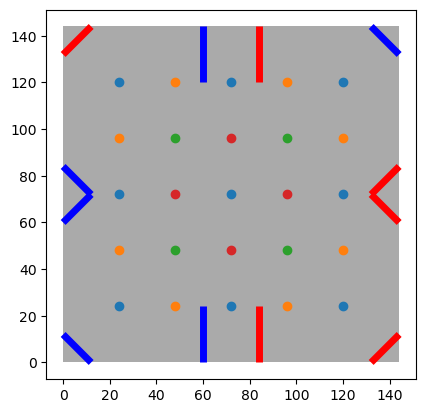

In [93]:
import matplotlib.pyplot as plt
junction_series = {k:gpd.GeoSeries(v) for k,v in junctions.items()}
frm = gpd.GeoDataFrame([{
   "name": "field",
   "series": gpd.GeoSeries(field) 
}] + [{
    "name": k + " junction",
    "series": v
} for k,v in junction_series.items()
]) 

p = plt.figure()
ax = plt.gca()
gpd.GeoSeries(field).plot(ax=ax, color="#AAA")
for k,v in junction_series.items():
    v.plot(ax=ax)

for k,v in field_lines.T.items():
    gpd.GeoSeries(v['shape']).plot(color=v['color'], ax=ax, linewidth=5.0)
    
plt.show()

In [94]:
import pyproj
crs = pyproj.CRS.Simple
gpd.GeoSeries(field).explore()

AttributeError: type object 'CRS' has no attribute 'Simple'

In [114]:
from branca.element import Figure
import folium
crs = "Simple"
fig2 = Figure(width=550, height=550)
m2=folium.Map(location=[72, 72], tiles=None, crs=crs)
folium.GeoJson(gpd.GeoSeries(field).to_json()).add_to(m2)
# Polygon(field.).add_to(m2)
m2 

In [110]:
field.boundary.coords.xy

(array('d', [0.0, 0.0, 144.0, 144.0, 0.0]),
 array('d', [0.0, 144.0, 144.0, 0.0, 0.0]))